# Data Visualisation and Storytelling

### Telling a compelling story

1. Foundation
*   Case Study: Data Storytelling
*   Define the Purpose
*   Choose the Right Metrics
*   Present the Data Effectively
*   Eliminate Clutter & Noise
2. Focus: Where is your focus of attention?
3. Tell a Story: What do you need the audience to know or takeaway?
4. Forward: Recommendations & Next steps

In [ ]:
#import matplotlib.pyplot as plt



---


# About the Dataset - World Gender Statistics

The Gender Statistics database is a comprehensive source for the latest sex-disaggregated data and gender statistics covering demography, education, health, access to economic opportunities, public life and decision-making, and agency. The Gender Statistics dataset is available at https://datacatalog.worldbank.org/search/dataset/0037654/Gender-Statistics

(https://drive.google.com/file/d/1f-qBseU7kEPSmwDEcUPIFFkY648TL5YO/view?usp=sharing).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_url = 'https://drive.google.com/file/d/1f-qBseU7kEPSmwDEcUPIFFkY648TL5YO/view?usp=sharing' # this is where we have stored our csv file - we need to make some changes to the file path to make it accessible
gender_data = 'https://drive.google.com/uc?export=download&id='+data_url.split('/')[-2]


gender_stats = pd.read_csv(gender_data, sep=',', encoding='utf-8', on_bad_lines='skip',index_col=False) #read the csv file from the location we provided
gender_stats.head() #prints the top few rows of our dataset




,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Algeria,DZA,1.54901175,1.510891632,1.470846098,1.671603524,1.882907279,1.908531544,1.963369223,1.974076968,1.963722524,1.950856942,1.927643415,1.883164068,1.887766803,1.839311509,..
1,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Angola,AGO,1.469131387,1.912291761,2.45752829,2.788587871,3.12760259,3.466660721,3.416735445,3.441454921,3.458326026,3.485549059,3.483300617,3.512207012,3.49477586,3.498733271,..
2,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Bahrain,BHR,1.999497539,2.176543418,2.161518292,2.175098672,2.168286572,2.193719939,2.213519603,2.331358919,2.394967476,2.461919433,2.502127177,2.548708788,2.569421998,2.872004138,..
3,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Benin,BEN,0.472525906,0.483349144,0.494552608,0.498037373,0.492779388,0.485022752,0.488530849,0.492317771,0.49158011,0.486681109,0.482436941,0.489376163,0.49241519,0.496703264,..
4,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Botswana,BWA,2.048127575,1.815242812,1.598674027,1.40162586,1.215620115,1.256277636,1.268173509,1.276453755,1.266917787,1.26097156,1.252982683,1.27728497,1.276663475,1.240929045,..


### data_preparation

Clean the `gender_stats` dataframe by filtering for the 'Employers, female' metric, handling missing values, and converting year columns to numeric.


In [2]:
import pandas as pd
import numpy as np

# 1. Filter for the specific 'Series Name'
series_to_keep = 'Employers, female (% of female employment) (modeled ILO estimate)'
gender_stats = gender_stats[gender_stats['Series Name'] == series_to_keep].copy()

# 2. Define year columns from 2009 to 2023
year_columns = [f'{year} [YR{year}]' for year in range(2009, 2024)]

# 3 & 4. Replace '..' with NaN and convert to numeric
for col in year_columns:
    gender_stats[col] = pd.to_numeric(gender_stats[col].replace('..', np.nan), errors='coerce')

# 5. Verify transformation
print("Data types of year columns:")
print(gender_stats[year_columns].dtypes)
print("\nUpdated DataFrame head:")
gender_stats.head()

Data types of year columns:
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
2023 [YR2023]    float64
dtype: object

Updated DataFrame head:


/tmp/ipython-input-1498822168.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_stats[col] = pd.to_numeric(gender_stats[col].replace('..', np.nan), errors='coerce')


,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Algeria,DZA,1.549012,1.510892,1.470846,1.671604,1.882907,1.908532,1.963369,1.974077,1.963723,1.950857,1.927643,1.883164,1.887767,1.839312,NaN
1,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Angola,AGO,1.469131,1.912292,2.457528,2.788588,3.127603,3.466661,3.416735,3.441455,3.458326,3.485549,3.483301,3.512207,3.494776,3.498733,NaN
2,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Bahrain,BHR,1.999498,2.176543,2.161518,2.175099,2.168287,2.193720,2.213520,2.331359,2.394967,2.461919,2.502127,2.548709,2.569422,2.872004,NaN
3,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Benin,BEN,0.472526,0.483349,0.494553,0.498037,0.492779,0.485023,0.488531,0.492318,0.491580,0.486681,0.482437,0.489376,0.492415,0.496703,NaN
4,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Botswana,BWA,2.048128,1.815243,1.598674,1.401626,1.215620,1.256278,1.268174,1.276454,1.266918,1.260972,1.252983,1.277285,1.276663,1.240929,NaN


### What do we do?

1. Tell a data story about female entrepreneurship using the World Gender Statistics dataset. Start by adding a 'Foundation' text cell to explain the significance of the 'Employers, female' metric as a measure of economic leadership.

2. Plot the trend of female employers (as a % of female employment) from 2009 to 2022 for Algeria, Angola, Bahrain, and Botswana.

3. Finally, include a concluding text cell that details the 'Focus' (main visual observation), the 'Story' (key regional takeaways), and 'Forward' (policy recommendations) based on the data provided.

### Narrative_foundation



### Foundation

**Purpose of the Analysis**
The primary goal of this analysis is to monitor and understand the progress of women in employer roles on a global scale. By examining historical trends across different regions, we aim to identify where female entrepreneurship is flourishing and where it remains stagnant, providing a data-driven basis for storytelling and policy recommendations.

**Choice of Metric**
We have selected the **'Employers, female (% of female employment) (modeled ILO estimate)'** metric for this study. This metric serves as a vital proxy for female economic leadership and entrepreneurship. Unlike general employment figures, the percentage of women who are specifically 'employers' highlights those who have reached a level of agency to create jobs and lead business enterprises, making it an essential indicator of gender parity in economic decision-making.

## visual_storytelling


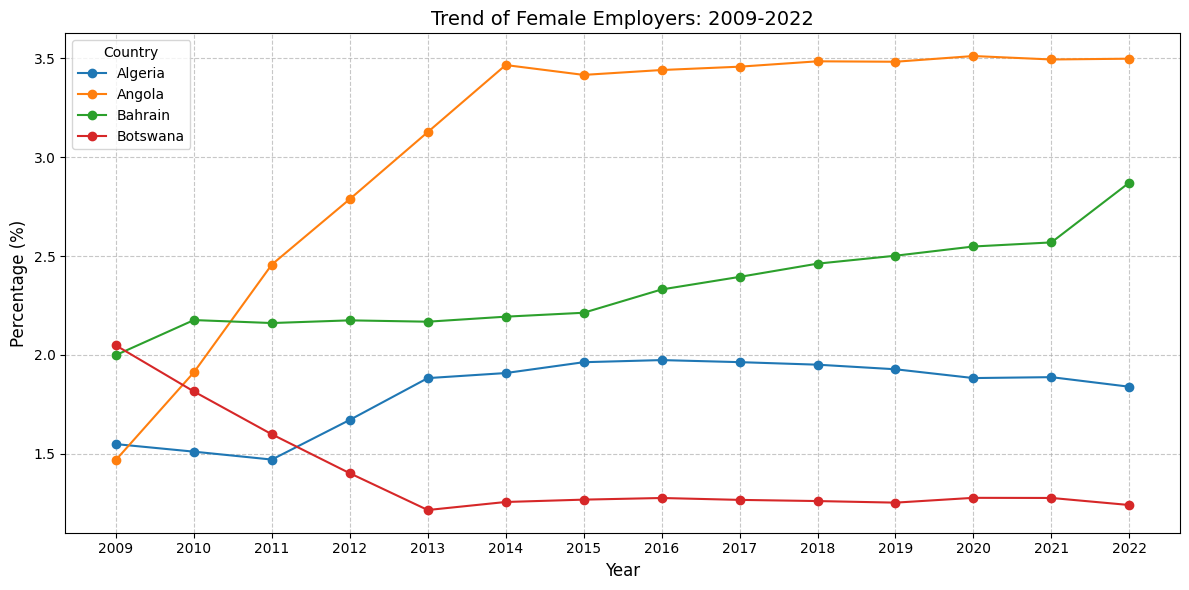

In [7]:
import matplotlib.pyplot as plt

# 1. Filter the gender_stats DataFrame for selected countries
selected_countries = ['Algeria', 'Angola', 'Bahrain', 'Botswana']
filtered_stats = gender_stats[gender_stats['Country Name'].isin(selected_countries)]

# 2. Prepare year columns and labels for 2009-2022
years_to_plot = [f'{year} [YR{year}]' for year in range(2009, 2023)]
x_axis_labels = [str(year) for year in range(2009, 2023)]

# 3. Create the figure in cell k0AmNyqm0zhi
plt.figure(figsize=(12, 6))

# 4. Loop through the filtered data and plot a line for each country
for _, row in filtered_stats.iterrows():
    plt.plot(x_axis_labels, row[years_to_plot], marker='o', label=row['Country Name'])

# 5. Customize the plot with title and axis labels
plt.title('Trend of Female Employers: 2009-2022', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# 6. Add legend, dashed grid, and use tight layout
plt.legend(title='Country', loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Focus, Story, and Forward

#### Focus: Visual Insights from the Data
The line plot generated in cell reveals distinct trajectories in female entrepreneurship across the four analyzed nations from 2009 to 2022.

**Angola** stands out with the most significant growth, more than doubling its percentage of female employers during this period. **Bahrain** also demonstrates a steady upward trend, indicating a positive shift in its economic landscape for women. In contrast, **Algeria** shows a more modest, fluctuating growth, while **Botswana** experienced a concerning decline in the proportion of women in employer roles compared to its 2009 levels.

### **Twist the question around!**

**What were the trends in female entrepreneurship for the analyzed countries between 2009 and 2022?**
The trends varied significantly across the four nations:
*   **Angola** experienced the most substantial growth, more than doubling its percentage of female employers.
*   **Bahrain** maintained a steady upward trajectory throughout the period.
*   **Algeria** showed modest growth characterized by fluctuations.
*   **Botswana** was the only country in the group to see a decline in the proportion of women in employer roles compared to its 2009 baseline.


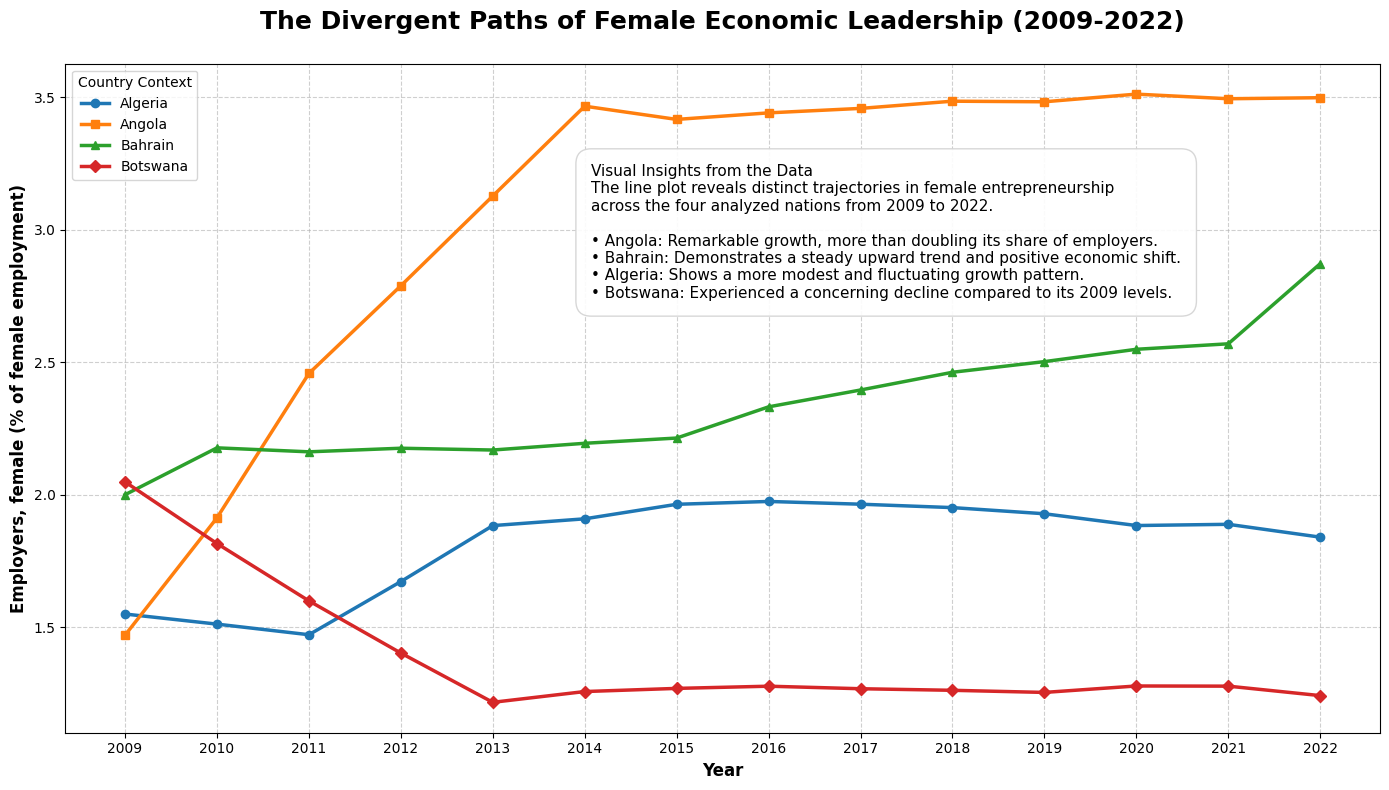

In [22]:
import matplotlib.pyplot as plt

# 1. Filter the pre-processed gender_stats DataFrame for our focus countries
selected_countries = ['Algeria', 'Angola', 'Bahrain', 'Botswana']
filtered_stats = gender_stats[gender_stats['Country Name'].isin(selected_countries)]

# 2. Define the period of analysis (2009-2022)
years_to_plot = [f'{year} [YR{year}]' for year in range(2009, 2023)]
x_axis_labels = [str(year) for year in range(2009, 2023)]

# 3. Initialize the plot with a narrative focus
fig, ax = plt.subplots(figsize=(14, 8))

# 4. Plot trends with distinct markers and thicker lines
markers = ['o', 's', '^', 'D']
for i, (_, row) in enumerate(filtered_stats.iterrows()):
    ax.plot(x_axis_labels, row[years_to_plot], marker=markers[i], linewidth=2.5, label=row['Country Name'])

# 5. Narrative-driven title and clear labeling
ax.set_title('The Divergent Paths of Female Economic Leadership (2009-2022)', fontsize=18, fontweight='bold', pad=25)
ax.set_xlabel('Year', fontsize=12, fontweight='semibold')
ax.set_ylabel('Employers, female (% of female employment)', fontsize=12, fontweight='semibold')

# 6. Create the 'Caption Card' within the chart area
insight_text = (
    "Visual Insights from the Data\n"
    "The line plot reveals distinct trajectories in female entrepreneurship\n"
    "across the four analyzed nations from 2009 to 2022.\n\n"
    "• Angola: Remarkable growth, more than doubling its share of employers.\n"
    "• Bahrain: Demonstrates a steady upward trend and positive economic shift.\n"
    "• Algeria: Shows a more modest and fluctuating growth pattern.\n"
    "• Botswana: Experienced a concerning decline compared to its 2009 levels."
)

# Positioning the text box (card) - shadow removed to prevent error
ax.text(0.4, 0.85, insight_text, transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=1', facecolor='white', edgecolor='lightgrey', alpha=0.9))

# 7. Final aesthetics: Legend, Grid, and Layout
ax.legend(title='Country Context', loc='best', frameon=True, fontsize=10)#loc='upper right'
ax.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()

# Display the final story component
plt.show()

### Data Analysis Key Findings

*   **Significant Growth in Angola:** Angola emerged as the leader in the group, with the percentage of female employers more than doubling between 2009 and 2022. This suggests a strong transition from general employment to job creation among women.
*   **Consistent Progress in Bahrain:** The data indicates a steady and reliable increase in female leadership within the business sector in Bahrain, reflecting effective regional efforts to diversify the workforce.
*   **Stagnation in Algeria:** While there was some growth, Algeria's trend was inconsistent and modest, suggesting that female-led SMEs may face barriers in transitioning to formal employer status.
*   **Deterioration in Botswana:** Botswana showed a concerning downward trend. The proportion of female employers in 2022 was lower than the levels recorded in 2009, indicating a potential increase in structural barriers or a lack of sustained support for female entrepreneurs.

### Insights or Next Steps

*   **Investigate Structural Barriers in Botswana:** A critical next step is to conduct qualitative research or a policy audit in Botswana to identify why female entrepreneurship is declining and to implement targeted credit and mentorship programs.
*   **Scale Successful Frameworks:** The policy interventions and economic conditions that led to the doubling of female employers in Angola should be codified and used as a blueprint for other nations in the region seeking to improve gender parity in business leadership.

#### Forward: Strategic Recommendations
Based on these findings, the following actions are recommended:
*   **Targeted Reinvestment (Botswana):** Conduct deep-dive qualitative research to identify the specific barriers causing the decline in female employers and implement targeted credit and mentorship programs.
*   **Scaling Success (Angola & Bahrain):** Codify the successful frameworks in these nations to serve as regional blueprints for supporting female economic agency.
*   **Regulatory Support (Algeria):** Streamline business registration and provide incentives for female-owned SMEs to transition into formal employer status.

**How did the share of female employers evolve across Algeria, Angola, Bahrain, and Botswana between 2009 and 2022?**